# Kinematic smearing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pdf
import pandas as pd
plt.rcParams["figure.figsize"] = (14,10)

In [2]:
fName = '/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/dataDPi.csv'

[-1.60268974 -0.81365466  4.14741898 ... -1.16746402  0.8462671
  1.96984696]
1207648
[-1.60268974 -0.81365466  4.14741898 ... -1.16746402  0.8462671
  1.96984696]


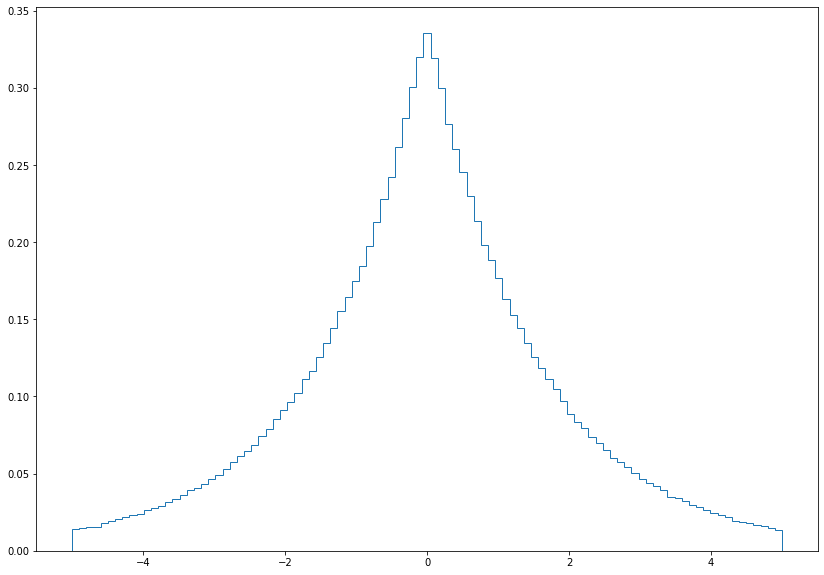

In [23]:
data = pd.read_csv(fName)

vDatamc = data['mcdeltat'].to_numpy()
vData = data["mcdeltat"].to_numpy()

print(vData)
vDataRes = vData[~np.isnan(vData)]
print(vData.size)

plt.hist(vData, histtype='step', density = True, bins=np.linspace(-5, 5, 100))
print(vData)

## Resolution function

{'mus': -0.02626095363057232, 'sigmas': 0.3072386712992503, 'fTMains': 0.4330089152605952, 'fTR': 0.29621524420552536, 'cLMs': 1.0678732529526804, 'cRMs': 0.9764846844663775, 'bigSigmaScale': 1.881006895250959, 'bigSigmaFrac': 0.3415193416782903, 'fTBigs': 0.14416447268870816, 'cRBs': 0.205387662844106, 'cLBs': 0.26434489064239036}


Text(0.5, 0, 'dt [ps]')

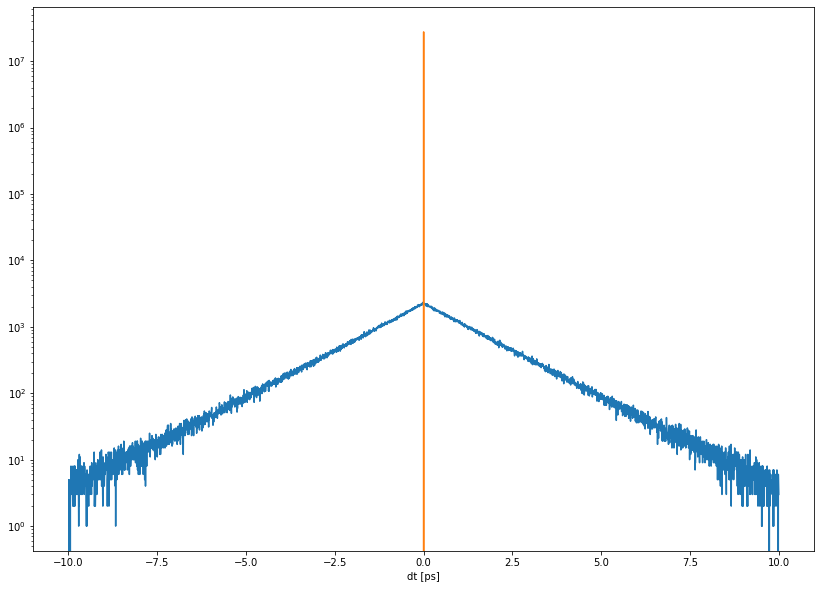

In [24]:
# Transform parameters from um to ps

beta = 276.11e-3
c = 299.792458 # um/ps
bgc = beta/(1 - beta**2)**0.5 * c

'''pars = {
   'mus': 2.5998222326911318 / bgc,
   'sigmas': 19.488840799952847 / bgc,
   'fTMains': 0.6879121782503139,
   'fTR': 0.5672982488332009,
   'cLMs': 0.03847980216578396 * bgc,
   'cRMs': 0.02771982014064649 * bgc,
   'bigSigmaScale': 6.947680846616044,
   'bigSigmaFrac': 0*0.16756917570490554,
   'fTBigs': 0.6268934047143494,
   'cLBs': 0.0003812636576085269 * bgc,
   'cRBs': 0.006550526360797996 * bgc
}'''




pars = {'mus': -0.02626095363057232, 'sigmas': 0.3072386712992503, 
 'fTMains': 0.4330089152605952, 'fTR': 0.29621524420552536,
 'cLMs': 1.0678732529526804, 'cRMs': 0.9764846844663775, 
 'bigSigmaScale': 1.881006895250959, 'bigSigmaFrac': 0.3415193416782903,
 'fTBigs': 0.14416447268870816, 
 'cRBs': 0.205387662844106, 'cLBs': 0.26434489064239036}

print(pars)

# Dummy parameters for no resolution smearing
pars0 = pars.copy()
pars0["mus"] = 0
pars0["sigmas"] = 0.0001
pars0["fTMains"] = 0
pars0["bigSigmaFrac"] = 0


xLim = 10
x = np.linspace(-xLim, xLim, 3500)

hMC = np.histogram((vData), bins=x)
xH = (hMC[1][1:] + hMC[1][:-1]) / 2
xSize = (x[1:] - x[:-1]) / 2
C = 2*xSize[0]*np.sum(hMC[0]) 


y = np.vectorize(lambda t : pdf.resFun(t, pars))(xH)
y0 = np.vectorize(lambda t : pdf.resFun(t, pars0))(xH)

plt.plot(xH, hMC[0], label="Delta T")
#plt.plot(x, C*y)
plt.plot(xH, C*y0)
plt.yscale("log")
plt.xlabel("dt [ps]")

## B Decays

Plot of the B-decay time for various thetaCMS, looks like huge differences

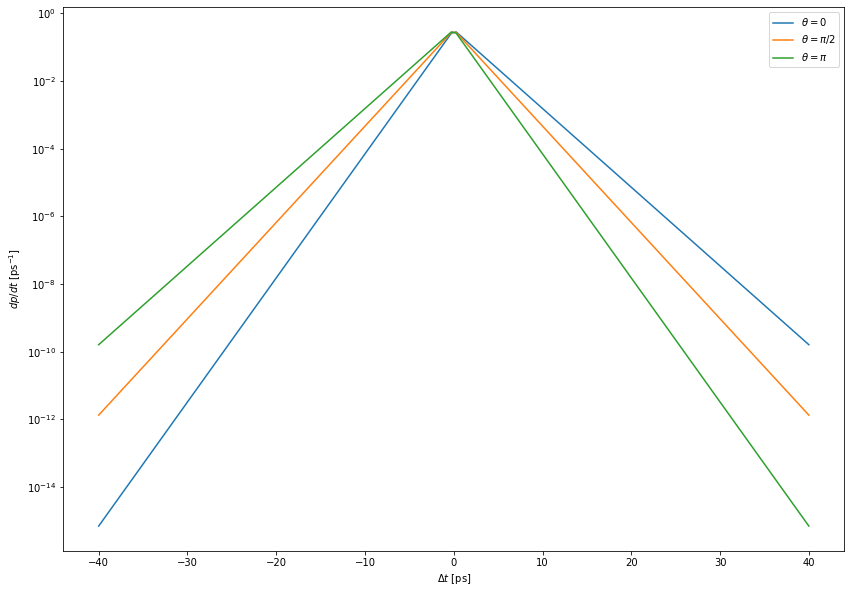

In [25]:
x    = np.linspace(-4*xLim, 4*xLim, 150)
tau = 1.525
y0   = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=tau, theta=0))(x)
yOrt = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=tau, theta=np.pi/2))(x)
y1   = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=tau, theta=np.pi))(x)
#yOrtR= np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, np.pi/2))(x)

plt.plot(x, y0,   label=r'$\theta=0$')
plt.plot(x, yOrt, label=r'$\theta=\pi/2$')
plt.plot(x, y1,   label=r'$\theta=\pi$')
plt.ylabel('$dp/dt$ [ps$^{-1}$]')
plt.xlabel(r'$\Delta t$ [ps]')
plt.legend()
plt.yscale("log")

Plot the comparizon of the theta-integrated scenario and the case with no kin-smearing effect

Text(0, 0.5, 'ratio')

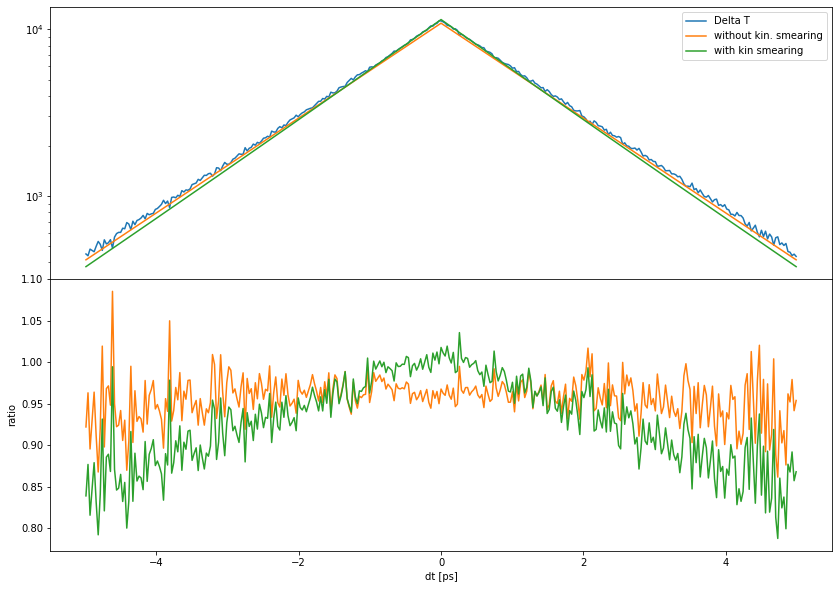

In [90]:
xLim = 5
x = np.linspace(-xLim, xLim, 350)

hMC = np.histogram((vData), bins=x)
xH = (hMC[1][1:] + hMC[1][:-1]) / 2
xSize = (x[1:] - x[:-1]) / 2

yOrt  = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=1.525, theta=np.pi/2))(xH)
#yTest = np.vectorize(lambda t : pdf.funDecayTheta(t, pars0, tau=1.u, theta=np.pi/2))(xH)
ySm   = np.vectorize(lambda t : pdf.funDecay(t, pars0, tau=1.45))(xH)
plt.subplots_adjust(hspace=0)
ax = plt.subplot(211)

C = 2*xSize[0]*np.sum(hMC[0]) 
plt.plot(xH, hMC[0], label="Delta T")
plt.plot(xH, C*yOrt, label='without kin. smearing')
plt.plot(xH, C*ySm, label='with kin smearing')
#plt.plot(xH, yTest, label='test curve')
plt.yscale("log")
#plt.xlabel("dt [ps]")
plt.legend()
plt.subplot(212, sharex=ax)

plt.plot(xH, C*yOrt / hMC[0], color='C1')
plt.plot(xH, C*ySm / hMC[0], color='C2')
#plt.plot(x, ySm / yOrt, color='C1')
#plt.plot(x, yTest / yOrt, color='C2')
plt.xlabel("dt [ps]")
plt.ylabel("ratio")

In [94]:
# Resolution function convoluted with (complex) exp
def FunT(x, pars2, c):
    fTR = 0.31340430614899284
    cLMs = 1.2707771594796793
    cRMs = 1.262960489679062
    bigSigmaScale = 1.788222555961523
    
    fTBigs = 0.21443091081597934
    cRBs = 0.32438876978700115
    cLBs = 0.3574431443828146
    sigmas = 0.0001
    fTMains = 0.
    bigSigmaFrac = 0.
    mus = 0.
  
    ret = 0
    
    # small gauss
    ret += (1-bigSigmaFrac) * (1-fTMains) * pdf.GE_conv([mus, sigmas], [0,c], x)
    ret += (1-bigSigmaFrac) * fTMains*(1.-fTR)* pdf.GEE_conv([mus,sigmas], [mus, -cLMs], [0, c], x) 
    ret += (1-bigSigmaFrac) * fTMains*(fTR)* pdf.GEE_conv([mus,sigmas], [mus, +cRMs], [0, c], x)
    # big gauss
    ret += bigSigmaFrac * (1-fTBigs) * pdf.GE_conv([mus, bigSigmaScale*sigmas], [0, c], x)
    ret += bigSigmaFrac * fTBigs*(1.-fTR)* pdf.GEE_conv([mus,bigSigmaScale*sigmas], [mus, -cLBs], [0, c], x)
    ret += bigSigmaFrac * fTBigs*(fTR)* pdf.GEE_conv([mus,bigSigmaScale*sigmas], [mus, +cRBs], [0, c], x)
    
    return ret

def fun(x, pars2, theta=np.pi/2, K=0.22359):
    #funDecayTheta(x, pars, tau=1.520, theta=np.pi/2, K=0.22359):
    #K = 0.22534  # currently hard-coded
    #K = 0.22359  # using nominal BoostVector and Y4S mass
    #tau = 1.520  # ps
    
    tau = pars2['tau']
    cp = +1./tau * 1./(1 + K*np.cos(theta))
    cm = -1./tau * 1./(1 - K*np.cos(theta))

    r = 1./(2*tau) * (1./abs(cp)*FunT(x, pars2, cp) + 1./abs(cm)*FunT(x, pars2, cm))
    return r

In [100]:
import chebFitter as chf
xLim = 5
ch = chf.chebFitter(516 + 1, -xLim, xLim, vData, fun)
#pars = {"mus" : 0, "sigmas" : 30,  "fTMains" : 0.9, "fTR" : 0.5, "fTBigs":0.1, "cLMs" : 0.1, "cRMs" : 0.1, "cLBs":0.1, "cRBs":0.1, "bigSigmaScale":5, "bigSigmaFrac":0.1 }

#fitting only tau
'''pars2 = {'mus': -0.08610714047972579, 'sigmas': 0.5091315159442221,
'fTMains': 0.09832738957341852, 'fTR': 0.10174099618701188, 
'fTBigs': 0.6328551389835905, 'cLMs': 0.3999846071704905, 
'cRMs': 0.027889518415346922, 'cLBs': 0.0008548848135162263, 
'cRBs': 0.2570742651027263, 'bigSigmaScale': 3.2011837446766096,
'bigSigmaFrac': 0.2966653507227578}'''

#pars2 = {'tau' : 1.525}
pars2 = res

#fitting all parameters 

'''pars2 = {'mus': -0.196653339889053, 'sigmas': 1.12068069365858, 
'fTMains': 0.4498672617963663, 'fTR': 0.3567122467437128,
'fTBigs': 0.9906174326348549, 'cLMs': 2.2733947269333297, 
'cRMs': 0.24218377207052944, 'cLBs': 0.00021283437372625395,
'cRBs': -0.0012211701579102714, 'bigSigmaScale': 0.5878869177069074, 
'bigSigmaFrac': 0.7479487292889979, 'tau': 1.6338318118649309}'''

#std


Limits = {'mus': (-10, 10),
        'sigmas': (10, 40),
        'fTMains': (0, 1),
        'fTR': (0, 1),
        'cLMs': (1e-5, 0.1),
        'cRMs': (1e-5, 0.1),
         "bigSigmaScale": (3, 40),
        'bigSigmaFrac' : (0,1),
        'fTBigs' : (0,1),
        'cLBs' : (1e-5, 0.05),
        'cRBs' : (1e-5, 0.05),
        'tau' : (1.0 , 2.0)}


res =  ch.fitData(pars2)
print(res)

Loading data grid
Done


/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/chebFitter.py:122: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m.migrad()  # run optimiser


0.0019051355811728174
{'tau': 1.5334400278176108}


In [101]:
def plotHist(d, bins, chFit, res):
    vals, bins = np.histogram(d, bins)
    xCnt  = (bins[1:] + bins[:-1]) / 2
    xSize = (bins[1:] - bins[:-1]) / 2
    
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios':[16,3]}, figsize=(12,8))
    axs[0].set_yscale('log')
    axs[0].errorbar(xCnt, vals, xerr=xSize, yerr=np.sqrt(vals), ls='none', fmt="o")
    
    N = np.dot(vals, 2*xSize) 
    x = np.linspace(bins[0], bins[-1], 100)
    y = N * chFit.funFast(x, res)
    axs[0].plot(x, y, label='tau = '+str(pars2['tau']) + ' ps')
    axs[0].legend(loc='lower center', shadow=True, fontsize='x-large')
    # plotRatio
    yRat= N * chFit.funFast(xCnt, res) 
    axs[1].errorbar(xCnt, vals/ yRat, xerr=xSize, yerr=np.sqrt(vals)/yRat, ls='none', fmt="o")

    dirName = "/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/Hist/"
    fig.savefig(dirName+"DPi_Tau.png", bbox_inches='tight')


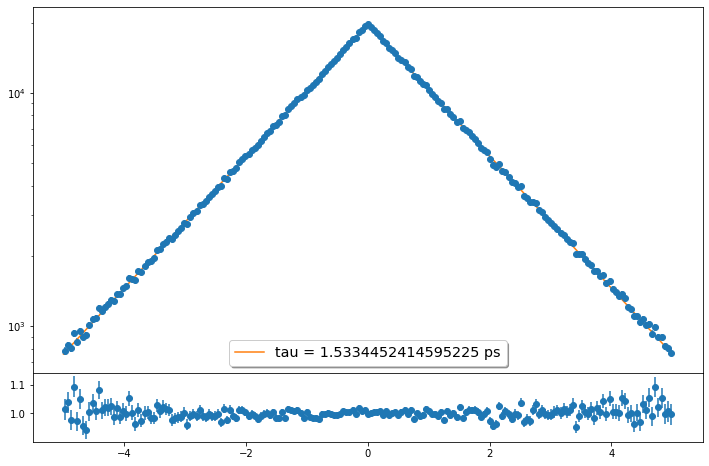

In [102]:
plotHist(vData, np.linspace(-xLim, xLim, 200), ch, res)

## B Oscilations

Let's first check the behaviour of the functions.

Notice that the real part is cosine and imaginery sine

In [5]:
#Checking the value at dt = 0 (should be equal)
print(pdf.funDecay(0, pars0), pdf.funOsc(0, pars0).real)

import scipy.integrate

#Checking the integrals

dm = 0.510
C = 1 + tau**2 * dm**2

print(scipy.integrate.quad(lambda t: C*pdf.funOscTheta(t, pars0, tau=tau, dm=dm, theta=np.pi/2).real, -40, 40))
print(scipy.integrate.quad(lambda t: C*pdf.funOscTheta(t, pars, tau=tau, dm=dm, theta=np.pi/2).real, -40, 40))
print(scipy.integrate.quad(lambda t: C*pdf.funOsc(t, pars0, tau=tau, dm=dm).real, -40, 40))
print(scipy.integrate.quad(lambda t: C*pdf.funOsc(t, pars,  tau=tau, dm=dm).real, -40, 40))

/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/pdf.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  r = abs(c.real) * np.exp(c*(m1+m2) + (sigma**2 * c**2)/2 - c*x) * 0.5 * erfc(S*( (m1+m2) + c*sigma**2 - x)/(np.sqrt(2) * sigma))
/nfs/dust/belle2/user/kapitanl/Analysis/Thesis/chebFitter/python/pdf.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  r = abs(c.real) * np.exp(c*(m1+m2) + (sigma**2 * c**2)/2 - c*x) * 0.5 * erfc(S*( (m1+m2) + c*sigma**2 - x)/(np.sqrt(2) * sigma))


0.3289299254648897 0.3269483225350676
(1.0000000034674392, 1.008167690983425e-08)
(0.9979367854923378, 2.4902269086317147e-12)
(1.0000000034763654, 1.2497163305444688e-08)
(0.9980312508289596, 2.2603604277978586e-12)


Composing the full function

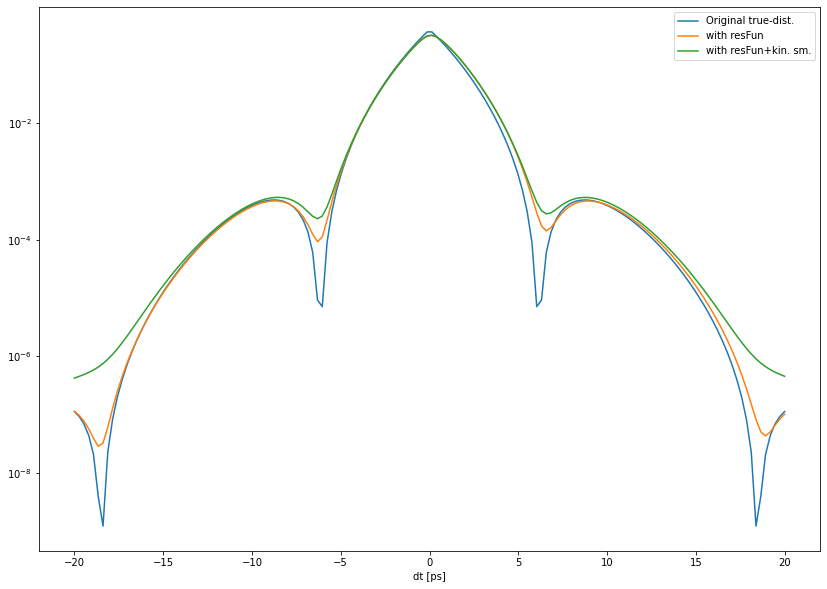

Normalizations: 0.9983991056885906 0.9992057244748622 0.9992045901884243


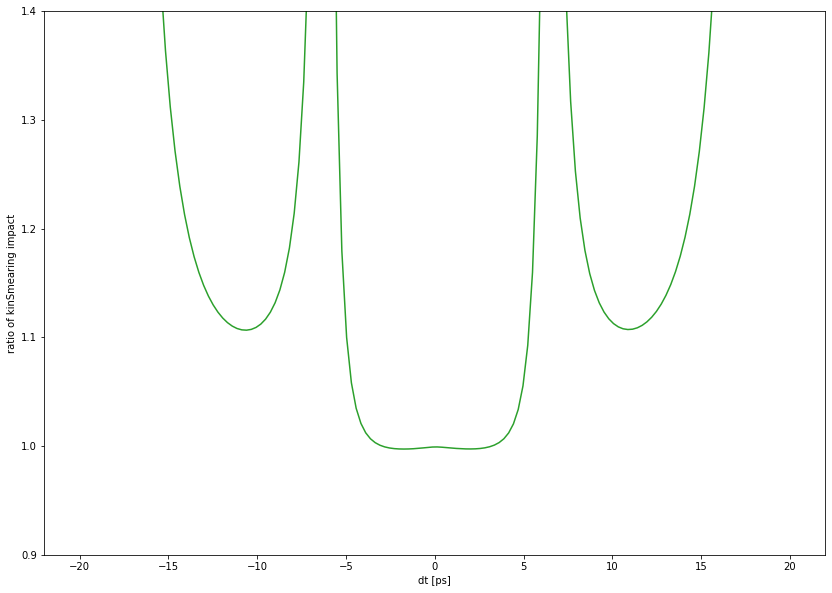

In [6]:
# exp(-|dt|/tau) * (1 + cos dm t)
def fullPDFnoKin(t, pars):
    C = 1 + 1./(1+tau**2 * dm**2)
    return 1/C * (pdf.funDecayTheta(t, pars, tau=tau, theta=np.pi/2) + pdf.funOscTheta(t, pars, tau=tau, dm=dm, theta=np.pi/2).real)

def fullPDF(t, pars):
    C = 1 + 1./(1+tau**2 * dm**2)
    return 1/C * (pdf.funDecay(t, pars, tau=tau) + pdf.funOscTheta(t, pars, tau=tau, dm=dm).real)


yOrt0 = np.vectorize(lambda t : fullPDFnoKin(t, pars0) )(x)
yOrt  = np.vectorize(lambda t : fullPDFnoKin(t, pars) )(x)
ySm   = np.vectorize(lambda t : fullPDF(t, pars) )(x)
plt.plot(x, yOrt0, label='Original true-dist.')
plt.plot(x, yOrt, label='with resFun')
plt.plot(x, ySm, label='with resFun+kin. sm.')
plt.yscale("log")
plt.xlabel("dt [ps]")
plt.legend()
plt.savefig('mixing.pdf')
plt.show()


# Impact of the kinematic term

plt.plot(x, ySm/yOrt, color='C2')
plt.xlabel("dt [ps]")
plt.ylabel("ratio of kinSmearing impact")
plt.ylim(0.9, 1.4)

# Check normalization
print('Normalizations:', np.sum(yOrt0)*(x[1]-x[0]), np.sum(yOrt)*(x[1]-x[0]), np.sum(ySm)*(x[1]-x[0]))


Plot with approximate cumulative statistic, assuming 1 bilion B-B pairs and BR=1e-4

Text(0, 0.5, 'Cumulative nunber of events')

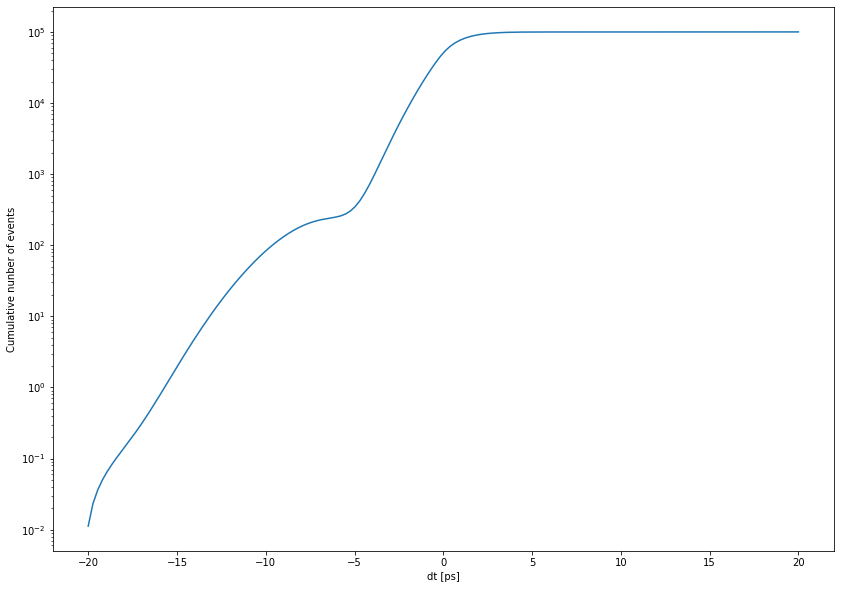

In [7]:
plt.plot(x, np.cumsum(ySm)/ np.cumsum(ySm)[-1] * 1e9 * 1e-4 )
plt.yscale("log")
plt.xlabel("dt [ps]")
plt.ylabel("Cumulative nunber of events")